In [2]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk")

from pathlib import Path
measurement_folder  = Path.cwd().parent / 'measurements' / 'steel_disk'

In [3]:
background_file = '20220419_table_ref.txt'

In [4]:
table_ref_pre = tdu.read_single_measurement(measurement_folder, '20220419_table_ref.txt')
table_ref_pre = tdu.df_convert_unix_to_datetime(table_ref_pre)

In [5]:
table_ref_pre.keys()

Index(['run_nr', 'hex_nr', 'point', 'x', 'y', 'z', 'unix_time', 'datetime'], dtype='object')

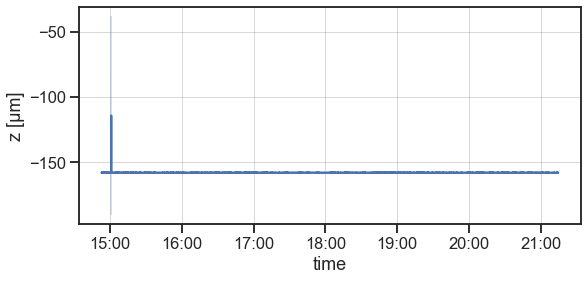

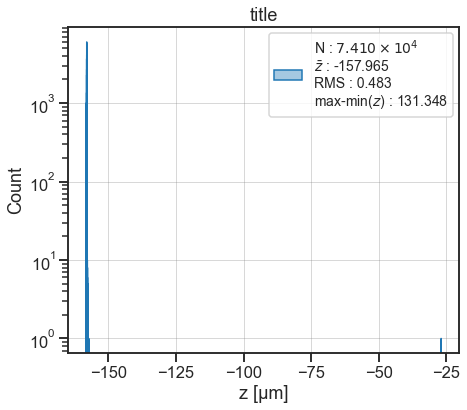

In [6]:
tdp.plot_data_vs_time(table_ref_pre)
tdp.ts_hist(table_ref_pre)
plt.yscale('log')

In [7]:
table_ref_pre_outs = table_ref_pre.loc[table_ref_pre.z > -100]

outlierer occure as always just in the first point of the measurement of a hexagon 

In [8]:
table_ref_pre_outs.point.unique()

array([1], dtype=int64)

In [9]:
table_ref_pre = table_ref_pre.loc[table_ref_pre.point != 1,:]

In [10]:
table_pre_pt = tdu.point_table(table_ref_pre)

## steeplate after curing 

In [11]:
curing_disk = tdu.read_single_measurement(measurement_folder, '20220421_steeplate_01_curing.txt')

filter for last run

In [12]:
last_run = curing_disk.run_nr.unique()[-1]

In [13]:
curing_disk = curing_disk.loc[curing_disk.run_nr == last_run,:]
curing_disk = tdu.df_convert_unix_to_datetime(curing_disk)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='z [µm]', ylabel='Count'>)

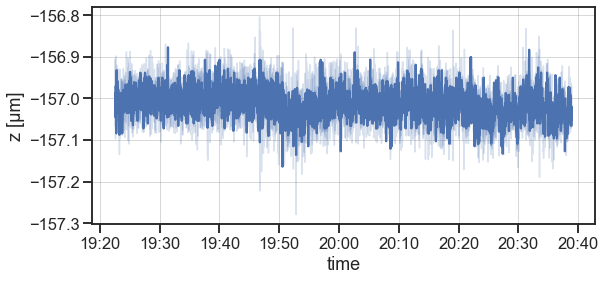

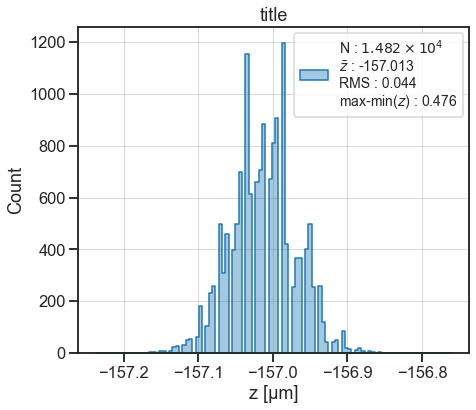

In [14]:
tdp.plot_data_vs_time(curing_disk)
tdp.ts_hist(curing_disk)

In [15]:
curing_disk_pt = tdu.point_table(curing_disk)

## combine pre handling

In [16]:
steel_pre_rel = tdu.subtract_mean_measurements(curing_disk_pt, table_pre_pt)
steel_pre_rel = tdu.df_convert_unix_to_datetime(steel_pre_rel)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='z [µm]', ylabel='Count'>)

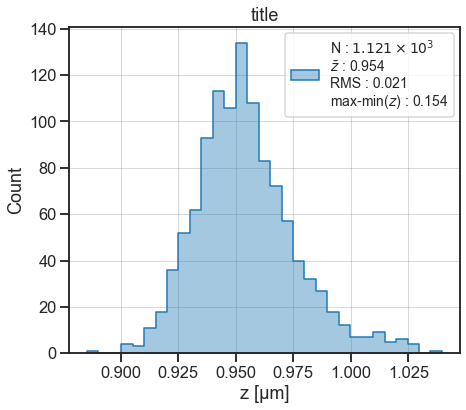

In [17]:
tdp.ts_hist(steel_pre_rel, mode='z_mean')

In [18]:
steel_pre_rel.z_mean = tdu.subtract_mean(steel_pre_rel.z_mean)
steel_pre_rel.z_mean = tdu.convert_mm_to_microns(steel_pre_rel.z_mean)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Steelplate - Table before Handling'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

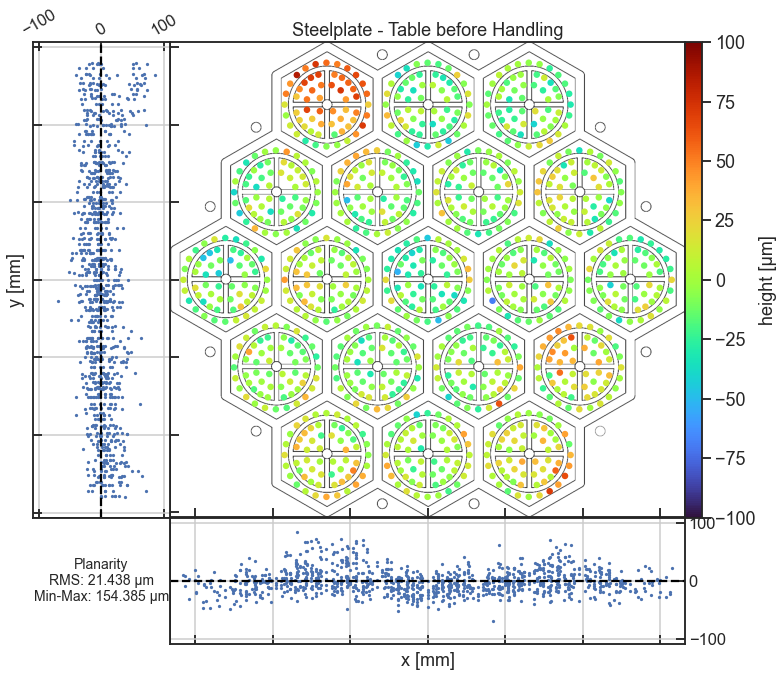

In [19]:
tdp.plot_table_hexagon_flatness(steel_pre_rel, mode='z_mean', title='Steelplate - Table before Handling')

# after handling

## Table Ref

import data

In [20]:
table_ref = tdu.read_single_measurement(measurement_folder, '20220502_table_ref.txt')
table_ref = tdu.df_convert_unix_to_datetime(table_ref)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='z [µm]', ylabel='Count'>)

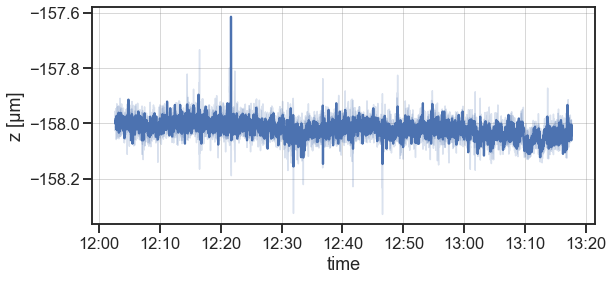

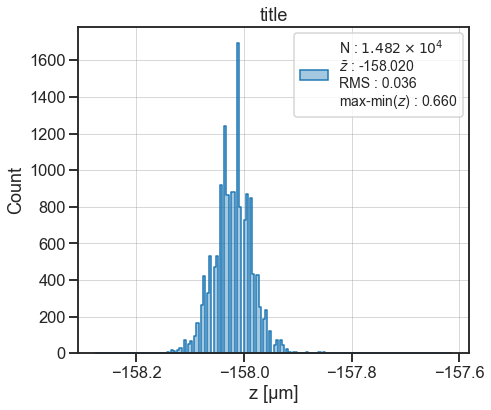

In [21]:
tdp.plot_data_vs_time(table_ref)
tdp.ts_hist(table_ref)
# plt.yscale('log')

In [22]:
table_ref_pt = tdu.point_table(table_ref)

In [23]:
table_ref_pt = tdu.df_convert_unix_to_datetime(table_ref_pt)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

posx and posy should be finite values


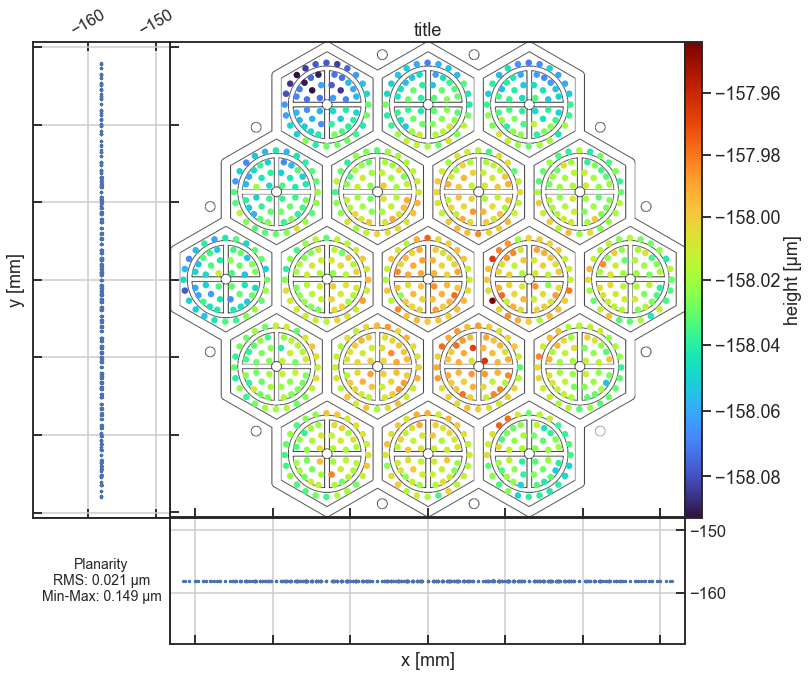

In [24]:
pn_min, pn_mean, pn_max = tdu.calc_min_mean_max(table_ref_pt, mode='z_mean')
tdp.plot_table_hexagon_flatness(table_ref_pt,
                                mode='z_mean',
                                cbar_norm=(pn_min, pn_mean, pn_max),
                                )

## Steelplate

data import

In [25]:
steel_handling = tdu.read_single_measurement(measurement_folder, '20220502_steelplate_01_after_handling.txt')
steel_handling = tdu.df_convert_unix_to_datetime(steel_handling)

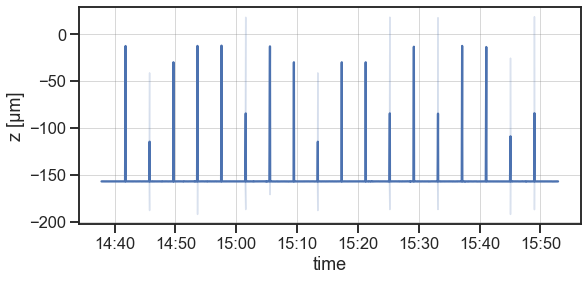

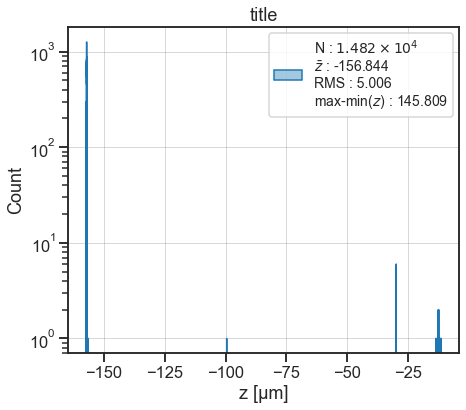

In [26]:
tdp.plot_data_vs_time(steel_handling)
tdp.ts_hist(steel_handling)
plt.yscale('log')

In [27]:
steel_handling = steel_handling.loc[steel_handling.point != 1,:]

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='z [µm]', ylabel='Count'>)

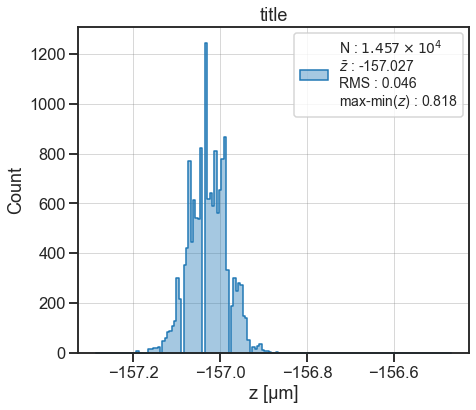

In [28]:
tdp.ts_hist(steel_handling)

In [29]:
steel_handling_pt = tdu.point_table(steel_handling)

## combine measurements

In [30]:
steel_rel = tdu.subtract_mean_measurements(steel_handling_pt, table_pre_pt)

In [31]:
steel_rel

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,z_mean_bg,z_err_bg,z_mean,z_err
0,1,2,1.651495e+09,3.36,12.56,0.013426,-157.009615,-157.940400,0.005928,0.930785,0.014677
1,1,3,1.651495e+09,9.19,9.19,0.007026,-157.035615,-157.938923,0.006933,0.903308,0.009871
2,1,4,1.651495e+09,12.56,3.36,0.012219,-157.008615,-157.947431,0.006260,0.938815,0.013729
3,1,5,1.651495e+09,19.32,5.18,0.014415,-157.010538,-157.928323,0.011574,0.917785,0.018487
4,1,6,1.651495e+09,17.32,10.00,0.010401,-157.011077,-157.948046,0.008827,0.936969,0.013642
...,...,...,...,...,...,...,...,...,...,...,...
1116,19,56,1.651500e+09,-90.89,30.43,0.009986,-157.039615,-157.970108,0.008145,0.930492,0.012887
1117,19,57,1.651500e+09,-84.38,33.13,0.008896,-157.031077,-157.963200,0.006737,0.932123,0.011159
1118,19,58,1.651500e+09,-78.79,37.42,0.008817,-157.017692,-157.956615,0.008770,0.938923,0.012436
1119,19,59,1.651500e+09,-74.50,43.01,0.007615,-157.038154,-157.969754,0.009951,0.931600,0.012530


In [32]:
steel_rel = tdu.df_convert_unix_to_datetime(steel_rel)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='z [µm]', ylabel='Count'>)

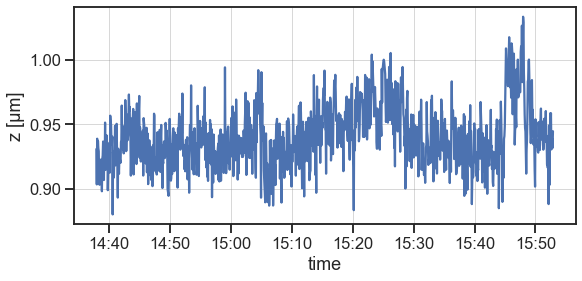

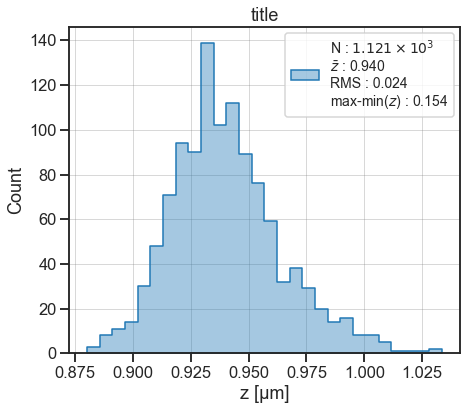

In [33]:
tdp.plot_data_vs_time(steel_rel, mode='z_mean')
tdp.ts_hist(steel_rel, mode='z_mean')

In [34]:
steel_rel.z_mean = tdu.subtract_mean(steel_rel.z_mean)
steel_rel.z_mean = tdu.convert_mm_to_microns(steel_rel.z_mean)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Steelplate - Table after Handling'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

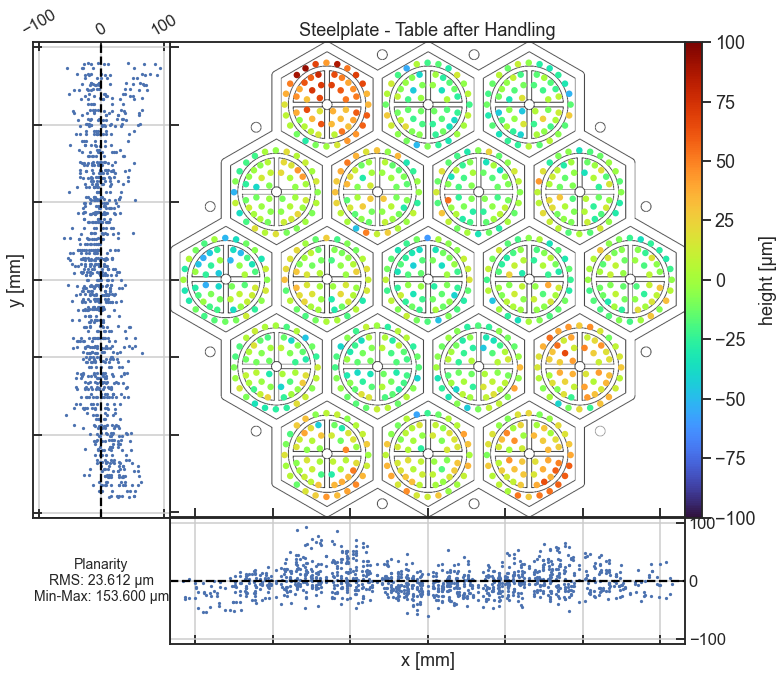

In [35]:
tdp.plot_table_hexagon_flatness(steel_rel, mode='z_mean',
                                title='Steelplate - Table after Handling')

# compare both pre handling and after handling 

In [36]:
steel_pre_after_handling = tdu.subtract_mean_measurements(curing_disk_pt, steel_handling_pt)

In [37]:
steel_pre_after_handling.z_mean = tdu.subtract_mean(steel_pre_after_handling.z_mean)
steel_pre_after_handling.z_mean = tdu.convert_mm_to_microns(steel_pre_after_handling.z_mean)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='z [µm]', ylabel='Count'>)

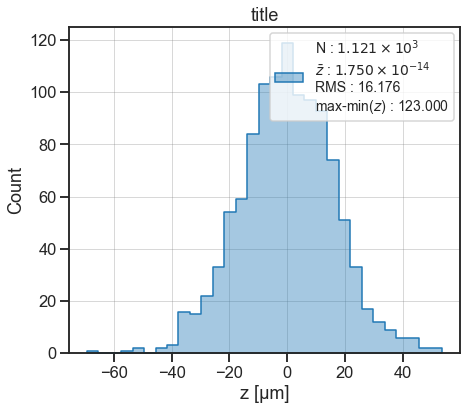

In [38]:
tdp.ts_hist(steel_pre_after_handling, mode='z_mean')

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Steelplate: after - before handling'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

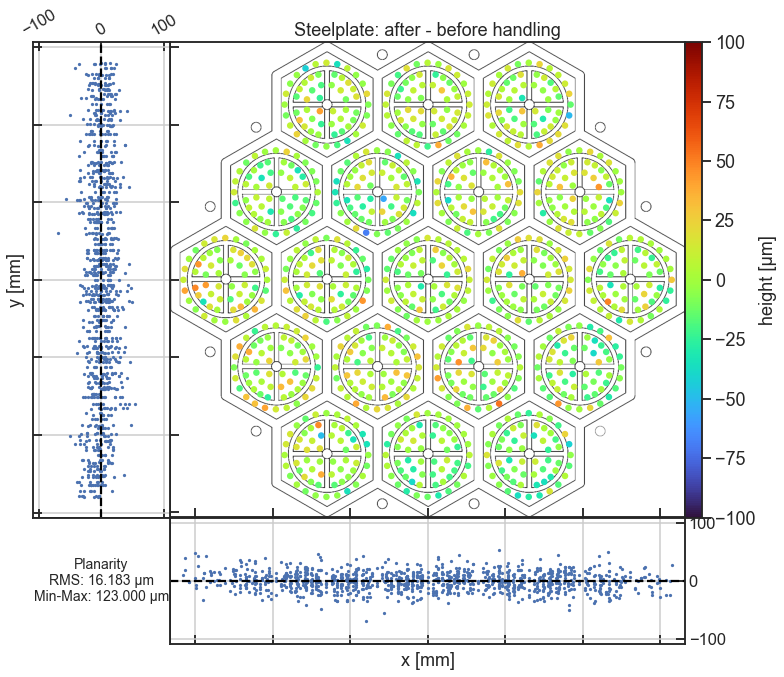

In [39]:
tdp.plot_table_hexagon_flatness(steel_pre_after_handling, mode='z_mean',
                                title='Steelplate: after - before handling')

## Test with subtracting both absolute plates from each other

In [40]:
steel_rel.loc[steel_rel.hex_nr==17].head(5)

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,z_mean_bg,z_err_bg,z_mean,z_err,datetime
944,17,2,1.651499e+09,3.36,125.58,0.009962,-157.066846,-158.003323,0.005762,-3.733041,0.011508,2022-05-02 15:41:11.846153728+02:00
945,17,3,1.651499e+09,9.19,122.21,0.009947,-157.073385,-157.978215,0.010383,-35.379194,0.014379,2022-05-02 15:41:15.692307712+02:00
946,17,4,1.651499e+09,12.56,116.38,0.013749,-157.039077,-157.982231,0.008659,2.943883,0.016248,2022-05-02 15:41:19.538461440+02:00
947,17,5,1.651499e+09,19.32,118.20,0.010097,-157.059308,-157.973631,0.007022,-25.886887,0.012299,2022-05-02 15:41:23.384615424+02:00
948,17,6,1.651499e+09,17.32,123.02,0.009100,-157.048231,-157.975538,0.006098,-12.902271,0.010955,2022-05-02 15:41:27.153846272+02:00


In [41]:
steel_pre_rel.loc[steel_pre_rel.hex_nr==17].head(5)

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,z_mean_bg,z_err_bg,z_mean,z_err,datetime
944,17,2,1.650738e+09,3.36,125.58,0.006926,-157.042923,-158.003323,0.005762,6.198820,0.009010,2022-04-23 20:27:00.153846272+02:00
945,17,3,1.650738e+09,9.19,122.21,0.008291,-157.030769,-157.978215,0.010383,-6.755026,0.013288,2022-04-23 20:27:04.076923136+02:00
946,17,4,1.650738e+09,12.56,116.38,0.011790,-157.022923,-157.982231,0.008659,5.106512,0.014629,2022-04-23 20:27:08+02:00
947,17,5,1.650738e+09,19.32,118.20,0.009552,-157.036846,-157.973631,0.007022,-17.416565,0.011856,2022-04-23 20:27:11.846153728+02:00
948,17,6,1.650738e+09,17.32,123.02,0.007807,-157.037385,-157.975538,0.006098,-16.047334,0.009906,2022-04-23 20:27:15.846153728+02:00


In [42]:
abs_diff = tdu.combine_mean_measurements(steel_rel, steel_pre_rel)

In [43]:
# abs_diff.z_mean = tdu.convert_mm_to_microns(abs_diff.z_mean)
abs_diff.z_mean = tdu.subtract_mean(abs_diff.z_mean)

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:title={'center':'Steelplate: after - before handling'}, xlabel='z [µm]', ylabel='Count'>)

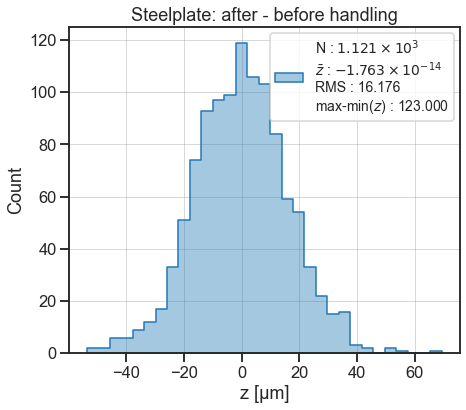

In [44]:
tdp.ts_hist(abs_diff, mode='z_mean', title='Steelplate: after - before handling')

In [45]:
steel_pre_rel.loc[(steel_pre_rel.point ==6)&(steel_pre_rel.hex_nr==16),:]

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,z_mean_bg,z_err_bg,z_mean,z_err,datetime
889,16,6,1.650738e+09,82.57,123.02,0.00871,-157.064615,-158.001138,0.009788,-17.678103,0.013102,2022-04-23 20:23:13.153846272+02:00


In [46]:
steel_rel.loc[(steel_rel.point ==6)&(steel_rel.hex_nr==16),:]

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,z_mean_bg,z_err_bg,z_mean,z_err,datetime
889,16,6,1.651499e+09,82.57,123.02,0.007658,-157.083385,-158.001138,0.009788,-22.456117,0.012428,2022-05-02 15:37:28.923076864+02:00


In [47]:
abs_diff.loc[(abs_diff.point ==6)&(abs_diff.hex_nr==16),:]

,hex_nr,point,unix_time,x,y,z_err_s,z_mean_s,z_mean_bg,z_err_bg,z_mean,z_err,datetime
889,16,6,1.651499e+09,82.57,123.02,0.007658,-157.083385,-158.001138,0.009788,-4.778014,0.018059,2022-05-02 15:37:28.923076864+02:00


(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'Steelplate: after - before handling'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

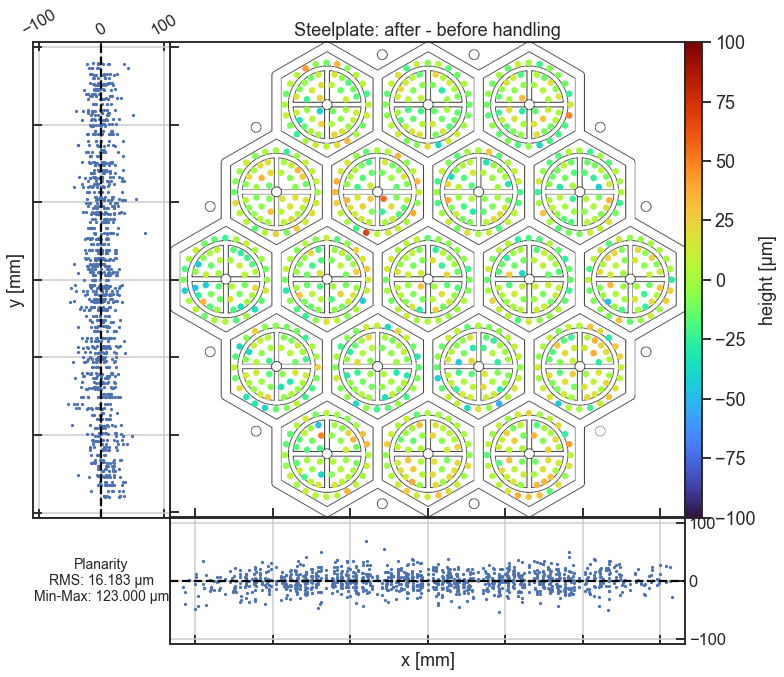

In [48]:
tdp.plot_table_hexagon_flatness(abs_diff, mode='z_mean',
                                title='Steelplate: after - before handling')

# table 1 - table 2

In [49]:
table_diff = tdu.subtract_mean_measurements(table_ref_pt, table_pre_pt)

In [50]:
table_diff.z_mean = tdu.subtract_mean(table_diff.z_mean)
table_diff.z_mean = tdu.convert_mm_to_microns(table_diff.z_mean)

(<Figure size 864x864 with 5 Axes>,
 (<AxesSubplot:title={'center':'title'}>,
  <AxesSubplot:xlabel='x [mm]'>,
  <AxesSubplot:ylabel='y [mm]'>))

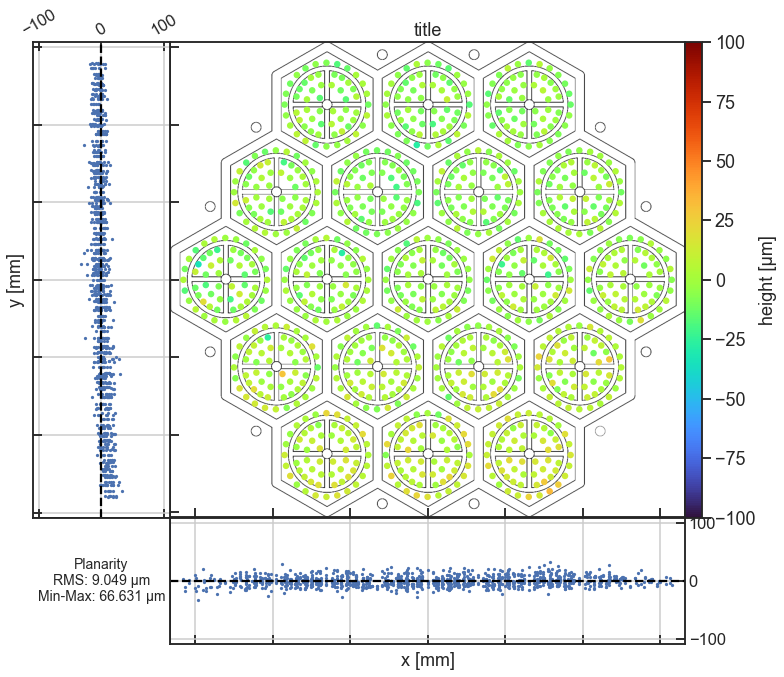

In [51]:
tdp.plot_table_hexagon_flatness(table_diff)